In [109]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import jax
import jax.numpy as jnp


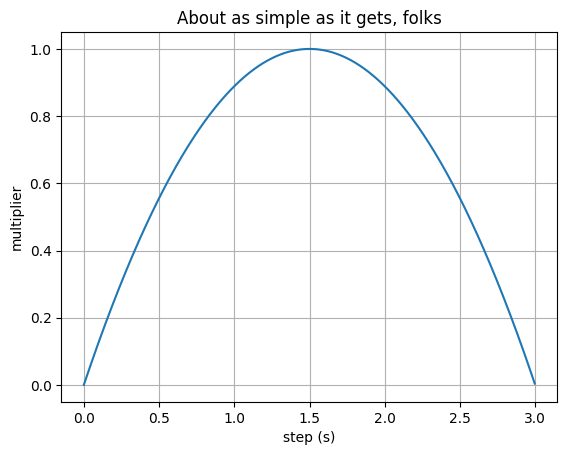

In [74]:
# Data for plotting
n_max = random.randint(100)+1
n_min = 0
delta = (n_max - n_min) / 1000
t = np.arange(n_min, n_max, delta)
s = (t - n_min) * (n_max - t) / ((n_max - n_min)/2)**2

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step (s)', ylabel='multiplier',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [17]:
fn = torch.tanh
f_min, f_max = (-5.0, 5.0)
delta = (f_max - f_min) / 1000
t = torch.from_numpy(np.arange(f_min, f_max, delta))
f_x = fn(t)
# ERROR: need create_graph so that backward pass isn't run in no_grad mode
# df_x = torch.func.grad(lambda x: fn(x))(t)

In [143]:
fn = jax.nn.tanh
f_min, f_max = (-5.0, 5.0)
delta = (f_max - f_min) / 1000
t = jnp.arange(f_min, f_max, delta)
fx = fn(t)
dfdx = jax.grad(fn)(t)
d2fdx = jax.vmap(jax.grad(jax.grad(fn)))(t)

fig, bx = plt.subplots()
bx.plot(t, fx, label='f(x)')
bx.plot(t, dfdx, label='df(x)/dx')
bx.plot(t, d2fdx, label='d2f(x)/dx')
bx.grid()
bx.legend()

plt.show()

TypeError: Gradient only defined for scalar-output functions. Output had shape: (1000,).

In [118]:
# jnp.random.rand((3,3))
_key = jax.random.PRNGKey(42)
a = jax.random.uniform(_key, (3,3))
a

Array([[0.6439377 , 0.32251573, 0.19349372],
       [0.8864933 , 0.7247435 , 0.19193006],
       [0.34513092, 0.2523831 , 0.6319014 ]], dtype=float32)

In [139]:
jax.vmap(jax.vmap(jax.grad(fn)))(a)

Array([[0.6778589 , 0.90279335, 0.9634752 ],
       [0.4963864 , 0.61579967, 0.96404904],
       [0.88974255, 0.9389132 , 0.68711627]], dtype=float32)

0.1